# Fun with figures

![Fun with Figures](./fun.jpg)

### When I was in University, I chose my specialization to be Data Science & Machine Learning

... and we were working **a lot** with Jupyter/iPython Notebooks

In [3]:
# Load API Key for OpenAI from .env
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv('OPENAI_KEY')

from openai import OpenAI
from IPython.display import Image

# Generate a simple image with a Dall-E prompt
client = OpenAI(api_key=api_key)

response = client.images.generate(
  model="dall-e-3",
  prompt="a university building in red bricks with the letter HTW Berlin on it",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

display(Image(url=image_url))

# Imagine

You have a (or multiple) broker accounts that make it very hard to track your trading performance over time. Therefore, we want to cleanup those files, track our transactions, net worth and compare it to some reference indices.

In [8]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# List of your CSV file names
file_names = ['simulated_trades.csv']

# Read each CSV file into a DataFrame and store them in a list
dfs = [pd.read_csv(file, sep='\t', encoding='latin1') for file in file_names]

# Concatenate all the DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# copy original data
df_original = combined_df

# data preparation
df_original['Timestamp'] = pd.to_datetime(df_original['Timestamp'], format="%m/%d/%y %I:%M %p")
df_original = df_original.sort_values(by='Timestamp')
df_original['Total'] = df_original['Price'] * df_original['Quantity']

# calculating the Profit/Loss
df_original['P/L'] = np.where(df_original['Transaction'] == 'Buy', -df_original['Total'], df_original['Total'])

df_original

,Timestamp,Symbol,Transaction,Quantity,Price,Total,P/L
0,2019-02-05 16:37:00,GOOGL,Buy,100,57.59,5759.35,-5759.35
1,2019-02-05 17:38:00,AMZN,Buy,100,82.94,8294.05,-8294.05
2,2019-03-04 17:58:00,NVDA,Buy,125,39.19,4899.37,-4899.37
3,2019-03-05 15:58:00,AMZN,Sell,20,84.62,1692.43,1692.43
4,2019-03-06 16:13:00,AMZN,Sell,10,83.45,834.48,834.48
5,2019-03-08 18:22:00,NFLX,Buy,20,349.60,6992.00,-6992.00
6,2019-03-25 18:46:00,AAPL,Buy,100,47.19,4718.50,-4718.50
7,2019-04-01 18:15:00,NFLX,Sell,5,366.96,1834.80,1834.80
8,2019-04-15 19:35:00,NFLX,Buy,15,348.87,5233.05,-5233.05
9,2019-04-30 15:36:00,MSFT,Buy,50,130.60,6530.00,-6530.00


In [9]:
df = df_original.copy(deep=True)

initial_portfolio = 300000

# Add the cumulative P/L list as a new column to the DataFrame
df['Cumulative P/L'] = df['P/L'].cumsum()
df['Portfolio Value'] = initial_portfolio + df['Cumulative P/L']

df

,Timestamp,Symbol,Transaction,Quantity,Price,Total,P/L,Cumulative P/L,Portfolio Value
0,2019-02-05 16:37:00,GOOGL,Buy,100,57.59,5759.35,-5759.35,-5759.35,294240.65
1,2019-02-05 17:38:00,AMZN,Buy,100,82.94,8294.05,-8294.05,-14053.40,285946.60
2,2019-03-04 17:58:00,NVDA,Buy,125,39.19,4899.37,-4899.37,-18952.77,281047.23
3,2019-03-05 15:58:00,AMZN,Sell,20,84.62,1692.43,1692.43,-17260.34,282739.66
4,2019-03-06 16:13:00,AMZN,Sell,10,83.45,834.48,834.48,-16425.87,283574.13
5,2019-03-08 18:22:00,NFLX,Buy,20,349.60,6992.00,-6992.00,-23417.87,276582.13
6,2019-03-25 18:46:00,AAPL,Buy,100,47.19,4718.50,-4718.50,-28136.37,271863.63
7,2019-04-01 18:15:00,NFLX,Sell,5,366.96,1834.80,1834.80,-26301.57,273698.43
8,2019-04-15 19:35:00,NFLX,Buy,15,348.87,5233.05,-5233.05,-31534.62,268465.38
9,2019-04-30 15:36:00,MSFT,Buy,50,130.60,6530.00,-6530.00,-38064.62,261935.38


## Let's add some styling!

In [10]:
def highlight_winloss(val):
    color = 'red' if '-' in val else 'green'  # Red for negative, green for positive or zero
    return 'color: %s' % color

def style_output(data):
    df = data.copy(deep=True)

    df['P/L $'] = df['P/L'].map('{:,.2f} $'.format)
    df['Cumulative P/L $'] = df['Cumulative P/L'].map('{:,.2f} $'.format)
    
    # format float fields
    for column in ['P/L', 'Price', 'Total', 'Portfolio Value', 'Cumulative P/L']:
        if column in df.columns:
            df[column] = df[column].map('{:,.2f}'.format)
    
    styled = df.style.applymap(highlight_winloss, subset=['P/L $', 'Cumulative P/L $'])
    return styled

style_output(df)

,Timestamp,Symbol,Transaction,Quantity,Price,Total,P/L,Cumulative P/L,Portfolio Value,P/L $,Cumulative P/L $
0,2019-02-05 16:37:00,GOOGL,Buy,100,57.59,"5,759.35","-5,759.35","-5,759.35","294,240.65","-5,759.35 $","-5,759.35 $"
1,2019-02-05 17:38:00,AMZN,Buy,100,82.94,"8,294.05","-8,294.05","-14,053.40","285,946.60","-8,294.05 $","-14,053.40 $"
2,2019-03-04 17:58:00,NVDA,Buy,125,39.19,"4,899.37","-4,899.37","-18,952.77","281,047.23","-4,899.37 $","-18,952.77 $"
3,2019-03-05 15:58:00,AMZN,Sell,20,84.62,"1,692.43","1,692.43","-17,260.34","282,739.66","1,692.43 $","-17,260.34 $"
4,2019-03-06 16:13:00,AMZN,Sell,10,83.45,834.48,834.48,"-16,425.87","283,574.13",834.48 $,"-16,425.87 $"
5,2019-03-08 18:22:00,NFLX,Buy,20,349.60,"6,992.00","-6,992.00","-23,417.87","276,582.13","-6,992.00 $","-23,417.87 $"
6,2019-03-25 18:46:00,AAPL,Buy,100,47.19,"4,718.50","-4,718.50","-28,136.37","271,863.63","-4,718.50 $","-28,136.37 $"
7,2019-04-01 18:15:00,NFLX,Sell,5,366.96,"1,834.80","1,834.80","-26,301.57","273,698.43","1,834.80 $","-26,301.57 $"
8,2019-04-15 19:35:00,NFLX,Buy,15,348.87,"5,233.05","-5,233.05","-31,534.62","268,465.38","-5,233.05 $","-31,534.62 $"
9,2019-04-30 15:36:00,MSFT,Buy,50,130.60,"6,530.00","-6,530.00","-38,064.62","261,935.38","-6,530.00 $","-38,064.62 $"


## And store it in a csv file

In [ ]:
df.to_csv('fun_with_figures.csv', sep=';', encoding='utf-8', index=True)

## Matching Buy/Sell transactions to trades

In [11]:
matched_trades = pd.DataFrame(columns=['Timestamp', 'Symbol', 'Quantity', 'Price', 'P/L', 'Total', 'Buy_Timestamp', 'Buy_Price',])

# Initialize a dictionary to track pending buy transactions
pending_buy_transactions = {}

matched_trades.set_index('Timestamp', inplace=True)

# Iterate through the sorted DataFrame and match partial trades
for index, row in df.iterrows():
    if row['Transaction'] == 'Buy':
        # Add the buy transaction to pending buy transactions
        pending_buy_transactions.setdefault(row['Symbol'], []).append({
            'Buy_Timestamp': row['Timestamp'],
            'Quantity': row['Quantity'],
            'Buy_Price': row['Price'],
        })
        
    elif row['Transaction'] == 'Sell':
        symbol = row['Symbol']
        
        if symbol in pending_buy_transactions and pending_buy_transactions[symbol]:

            # Find the earliest pending buy transaction for the same symbol
            pending_buy = pending_buy_transactions[symbol][0]

            # Calculate the quantity to match
            quantity_to_match = min(row['Quantity'], pending_buy['Quantity'])

            # Update the pending buy transaction and sell transaction
            pending_buy['Quantity'] -= quantity_to_match
            row['Quantity'] -= quantity_to_match

            # Calculate profit or loss for the matched trade
            profit_loss = (row['Price'] - pending_buy['Buy_Price']) * quantity_to_match

             # Create a DataFrame for the matched trade
            matched_trade = pd.DataFrame({
                'Timestamp':     [row['Timestamp']],
                'Symbol':        [symbol],
                'Quantity':      [quantity_to_match],
                'Price':         [row['Price']],
                'Total':         [quantity_to_match * row['Price']],
                'Buy_Timestamp': [pending_buy['Buy_Timestamp']],
                'Buy_Price':     [pending_buy['Buy_Price']],
                'P/L':           [profit_loss],
            })

            # Concatenate the matched trade DataFrame with matched_trades
            matched_trades = pd.concat([matched_trades, matched_trade], ignore_index=True)

            # Remove the pending buy transaction if fully matched
            if pending_buy['Quantity'] == 0:
                pending_buy_transactions[symbol].pop(0)


matched_trades['Cumulative P/L'] = matched_trades['P/L'].cumsum()

cols = list(matched_trades.columns)
cols.remove('Buy_Timestamp')
matched_trades=matched_trades[cols]

style_output(matched_trades)

,Symbol,Quantity,Price,P/L,Total,Buy_Price,Timestamp,Cumulative P/L,P/L $,Cumulative P/L $
0,AMZN,20,84.62,33.62,"1,692.43",82.940498,2019-03-05 15:58:00,33.62,33.62 $,33.62 $
1,AMZN,10,83.45,5.07,834.48,82.940498,2019-03-06 16:13:00,38.69,5.07 $,38.69 $
2,NFLX,5,366.96,86.80,"1,834.80",349.600006,2019-04-01 18:15:00,125.49,86.80 $,125.49 $
3,AAPL,100,50.18,299.50,"5,018.00",47.185001,2019-05-09 19:19:00,424.99,299.50 $,424.99 $
4,AMZN,10,91.13,81.94,911.34,82.940498,2019-05-13 15:13:00,506.92,81.94 $,506.92 $
5,AAPL,50,44.74,-8.63,"2,237.13",44.915001,2019-05-24 15:43:00,498.30,-8.63 $,498.30 $
6,GOOGL,10,51.94,-56.56,519.37,57.593498,2019-06-03 18:26:00,441.73,-56.56 $,441.73 $
7,NVDA,15,37.94,-18.83,569.10,39.195000,2019-06-21 16:21:00,422.91,-18.83 $,422.91 $
8,AMZN,10,93.91,109.73,939.13,82.940498,2019-06-25 15:26:00,532.64,109.73 $,532.64 $
9,NVDA,50,37.87,-66.25,"1,893.50",39.195000,2019-06-25 18:13:00,466.39,-66.25 $,466.39 $


## Adding some statistics

In [12]:
total_PL = matched_trades['P/L'].sum()

# Filter the DataFrame to get only the Wins and Losses
win_trades = matched_trades[matched_trades['P/L'] > 0]
loss_trades = matched_trades[matched_trades['P/L'] < 0]

# Calculate the median and mean for Wins
win_median = win_trades['P/L'].median()
win_mean = win_trades['P/L'].mean()

# Calculate the median and mean for Losses
loss_median = loss_trades['P/L'].median()
loss_mean = loss_trades['P/L'].mean()

total_profitable = len(win_trades)
total_non_profitable = len(loss_trades)
total = total_profitable + total_non_profitable

profit_percent= (total_profitable / total) * 100
non_profit_percent=  (total_non_profitable / total) * 100

# Calculate the standard deviation of the returns of your trades
std_deviation = matched_trades['P/L'].std()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Metric": ["Total P/L", "Total Profitable Trades", "Total Non-Profitable Trades", "Median Win", "Mean Win", "Median Loss", "Mean Loss", "Std Deviation"],
    "Value": [total_PL, f"{total_profitable} / {total} ({profit_percent:.2f}%)", f"{total_non_profitable} / {total} ({non_profit_percent:.2f}%)", win_median, win_mean, loss_median, loss_mean, std_deviation]
})
pd.set_option('display.max_columns', None)
summary_df = summary_df.set_index('Metric')

summary_df

,Value
Metric,
Total P/L,121576.89
Total Profitable Trades,90 / 110 (81.82%)
Total Non-Profitable Trades,20 / 110 (18.18%)
Median Win,552.69
Mean Win,1544.99
Median Loss,-505.92
Mean Loss,-873.59
Std Deviation,3260.68


## Draw the performance graph for all trades

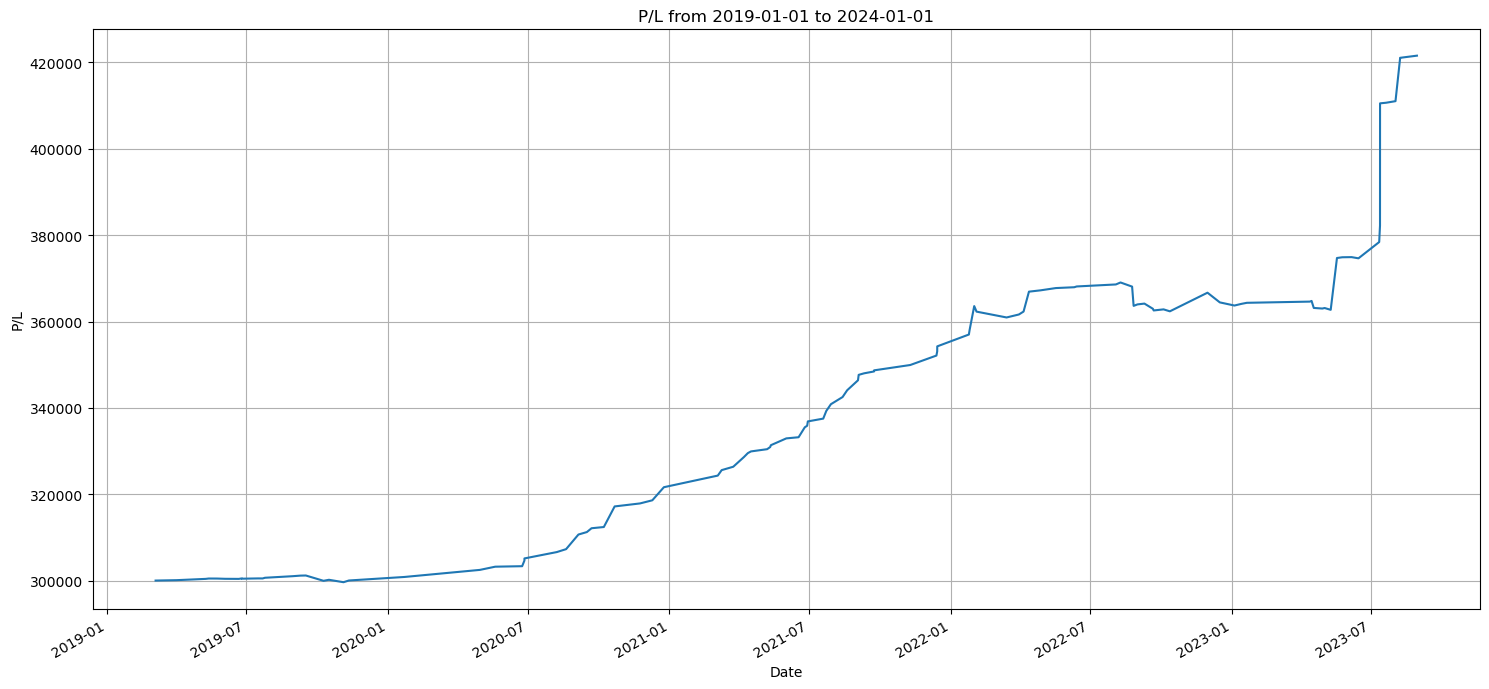

In [13]:
import matplotlib.pyplot as plt

def plotYearlyGraph(data, start, end):
    start_date = pd.to_datetime(start, format='%Y-%m-%d')
    end_date = pd.to_datetime(end, format='%Y-%m-%d')
    
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    daily_pl = data.groupby('Timestamp')['P/L'].sum()
            
    filtered_daily_pl = daily_pl[(daily_pl.index >= start_date) & (daily_pl.index <= end_date)].cumsum()
    
    filtered_daily_pl = filtered_daily_pl + initial_portfolio

    plt.figure(figsize=(15, 7))
    filtered_daily_pl.plot()
    plt.title(f'P/L from {start} to {end}')
    plt.xlabel('Date')
    plt.ylabel('P/L')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plotYearlyGraph(matched_trades, '2019-01-01', '2024-01-01')



## ... and compare it with stocks or indices

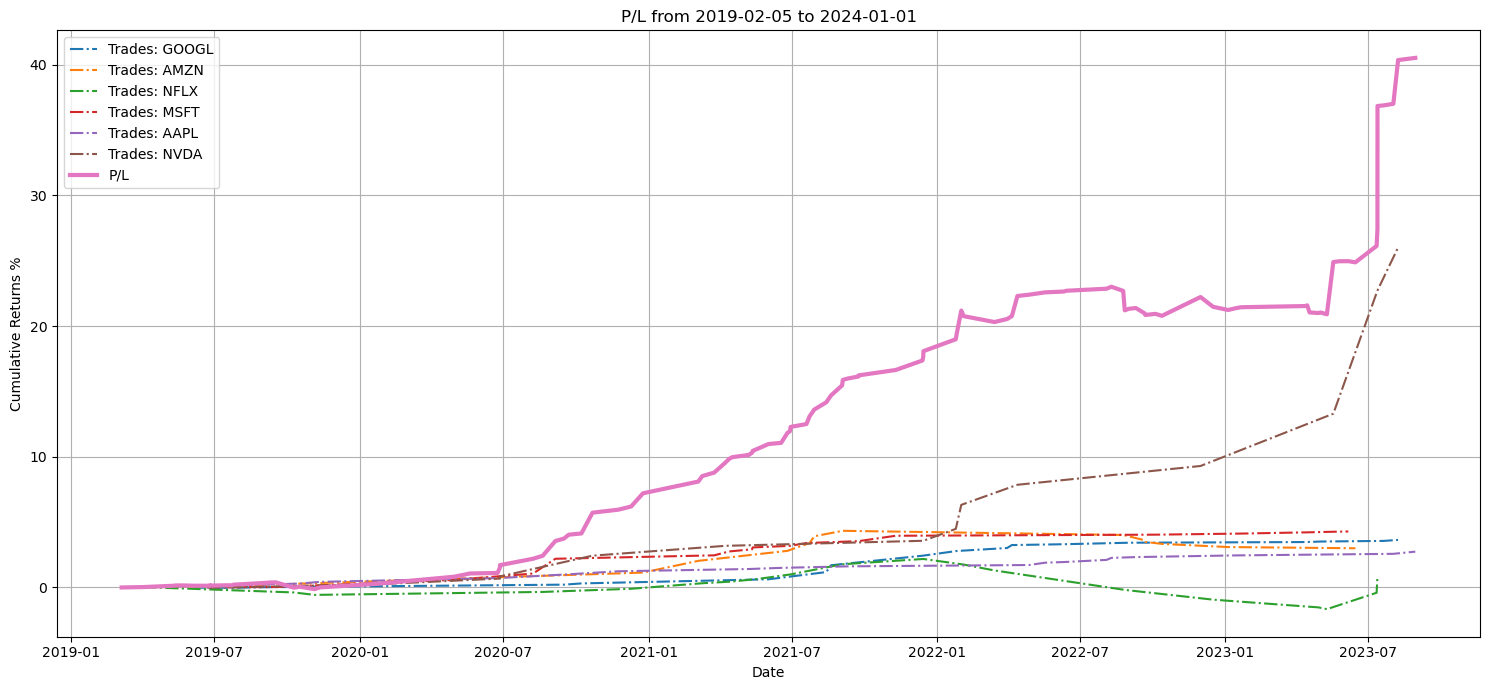

[*********************100%%**********************]  1 of 1 completed


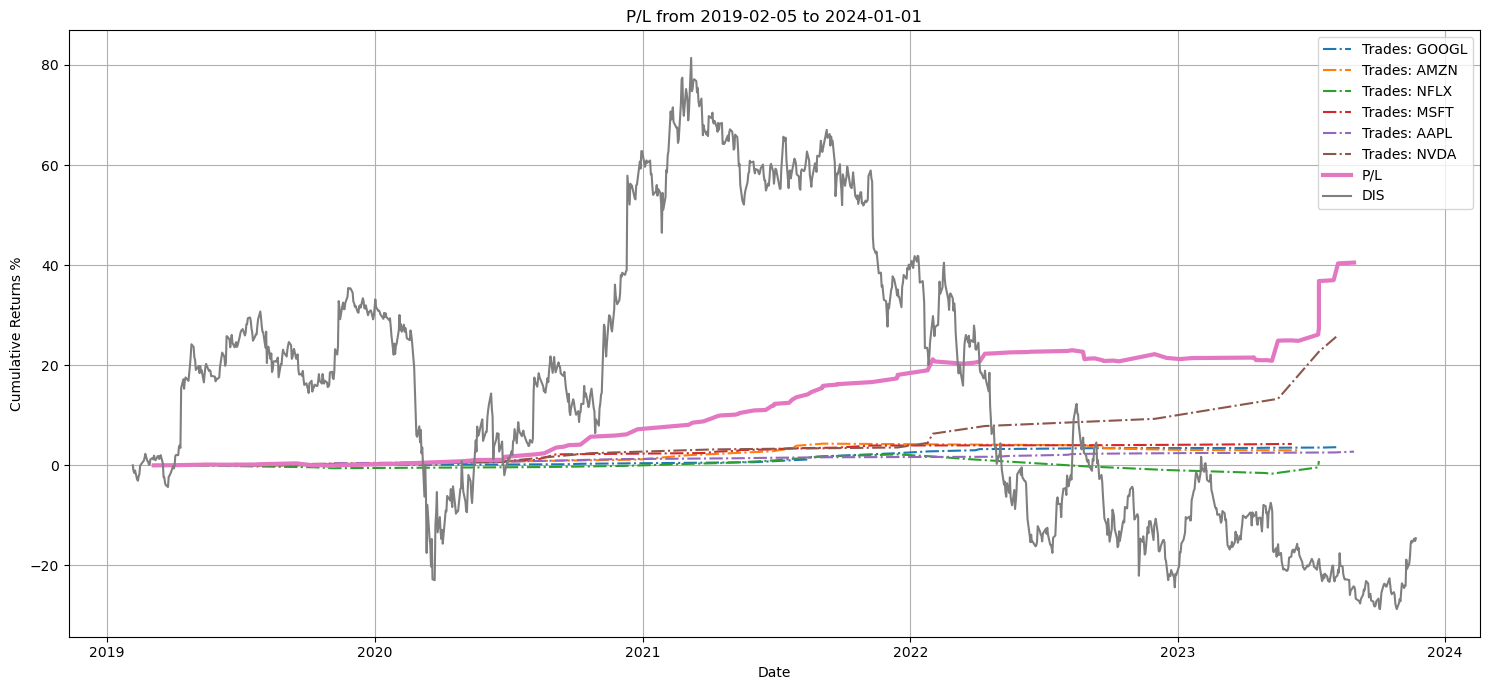

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


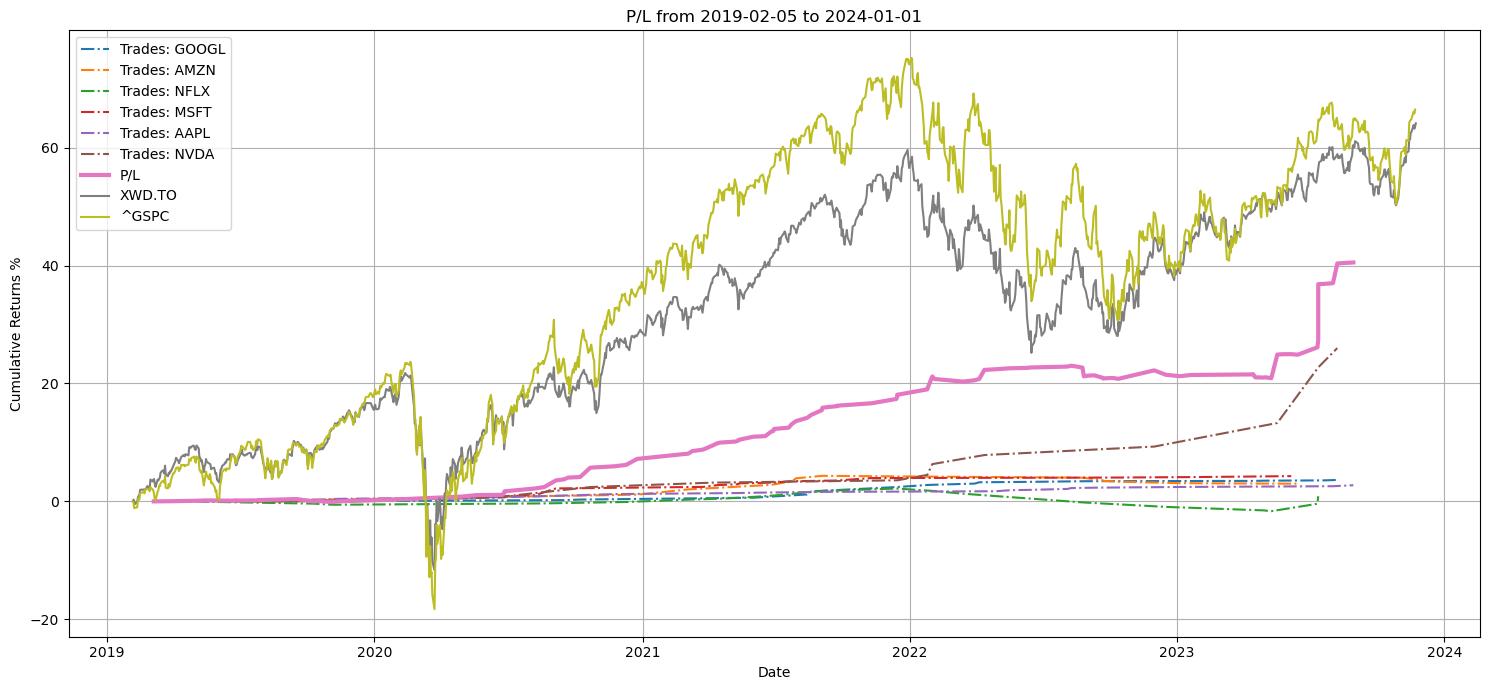

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


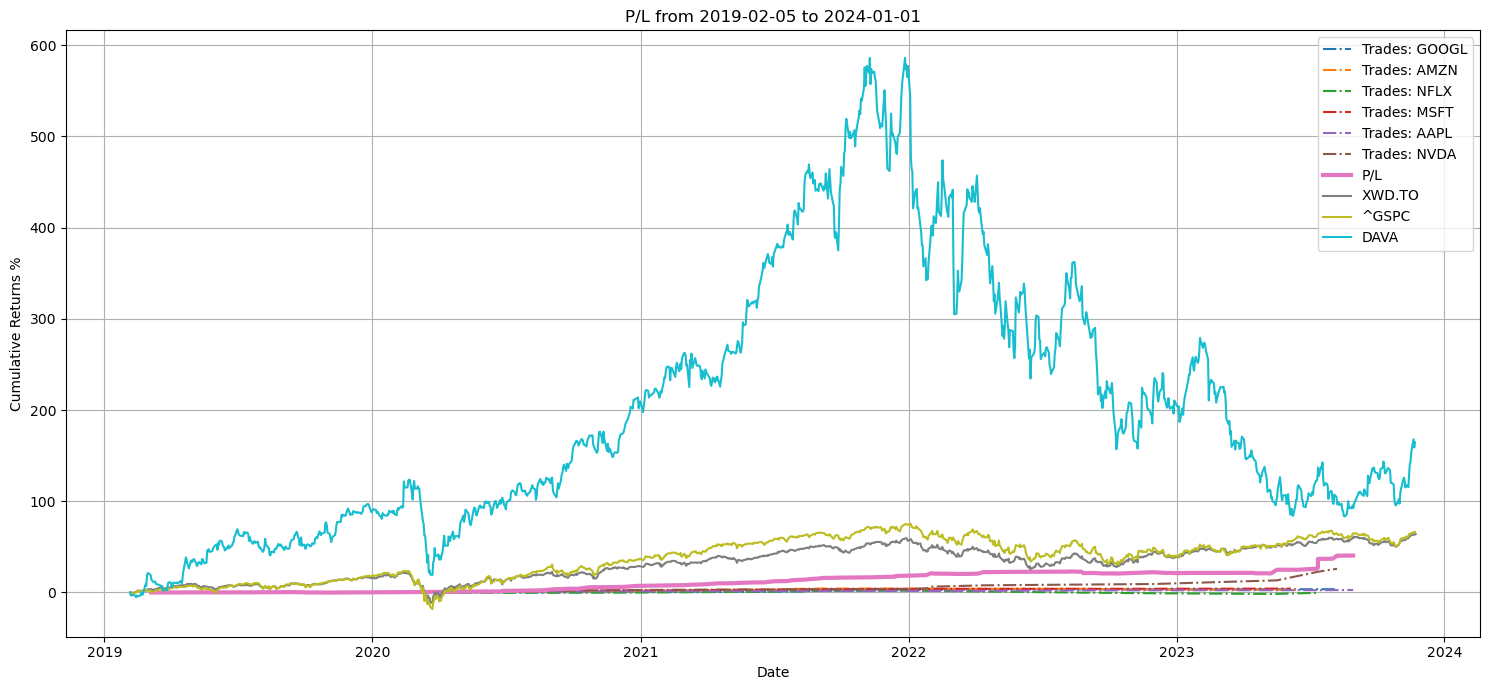

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def plotYearlyGraph(data, start, end, reference_stocks):
    start_date = pd.to_datetime(start, format='%Y-%m-%d')
    end_date = pd.to_datetime(end, format='%Y-%m-%d')
    
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    filtered_data = data.set_index('Timestamp')
    filtered_data = filtered_data[(filtered_data.index >= start_date) & (filtered_data.index <= end_date)]
    
    plt.figure(figsize=(15, 7))
    
    # filter my symbol
    for symbol in ['GOOGL', 'AMZN', 'NFLX', 'MSFT', 'AAPL', 'NVDA']:
        symbol_data = filtered_data[filtered_data['Symbol'] == symbol]
        symbol_pl = (symbol_data.groupby('Timestamp')['P/L'].sum().cumsum() / initial_portfolio) * 100
        plt.plot(symbol_pl.index, symbol_pl, linestyle='-.', label="Trades: " + symbol)

    
    daily_pl = filtered_data.groupby('Timestamp')['P/L'].sum()
    filtered_daily_pl = daily_pl.cumsum()
    pl = ((filtered_daily_pl - filtered_daily_pl.iloc[0]) / initial_portfolio) * 100  # Start at 0 and subtract the initial value

    
    plt.plot(filtered_daily_pl.index, pl, label='P/L', linewidth=3)
    
    # Download historical data for NASDAQ and S&P 500
    for chart_symbol in reference_stocks:
        ref_data = yf.download(chart_symbol, start=start, end=end)
        ref_returns = (ref_data['Adj Close'] / ref_data['Adj Close'].iloc[0] - 1) * 100
        plt.plot(ref_returns.index, ref_returns, label=chart_symbol)
    
    plt.title(f'P/L from {start} to {end}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns %')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plotYearlyGraph(matched_trades, '2019-02-05', '2024-01-01', [])
plotYearlyGraph(matched_trades, '2019-02-05', '2024-01-01', ['DIS'])
plotYearlyGraph(matched_trades, '2019-02-05', '2024-01-01', ['XWD.TO', '^GSPC'])
plotYearlyGraph(matched_trades, '2019-02-05', '2024-01-01', ['XWD.TO', '^GSPC', 'DAVA'])





In [23]:
top_3_profits = matched_trades.nlargest(3, 'P/L')
display(top_3_profits)

top_3_losses = matched_trades.nsmallest(3, 'P/L')
display(top_3_losses)

,Symbol,Quantity,Price,P/L,Total,Buy_Price,Timestamp,Cumulative P/L
104,NVDA,75,439.02,28292.81,32926.50,61.78,2023-07-12 17:49:00,110534.94
98,NVDA,50,301.78,11999.87,15089.00,61.78,2023-05-17 19:04:00,74723.36
107,NVDA,25,454.17,9809.69,11354.25,61.78,2023-08-07 17:08:00,120849.77


,Symbol,Quantity,Price,P/L,Total,Buy_Price,Timestamp,Cumulative P/L
80,NFLX,15,223.28,-4462.95,3349.20,520.81,2022-08-26 17:45:00,63635.83
88,NFLX,10,290.71,-2244.40,2907.10,515.15,2022-12-16 15:44:00,64446.67
94,NFLX,5,332.72,-1624.30,1663.60,657.58,2023-04-17 16:30:00,63161.08
